# **Medial Cost Personal Prediction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import xgboost as xgb

%matplotlib inline

In [2]:
insurance_dataset = pd.read_csv('data/insurance.csv')
insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
insurance_dataset.shape

(1338, 7)

In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


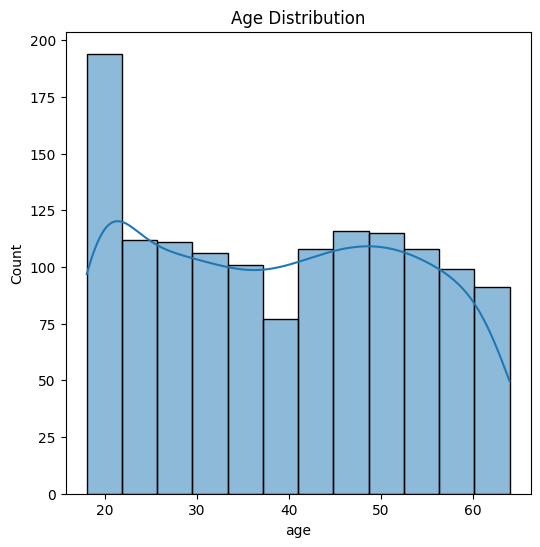

In [7]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

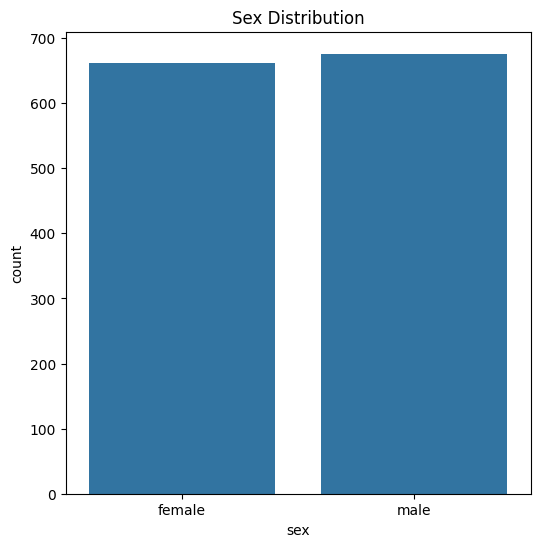

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [9]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

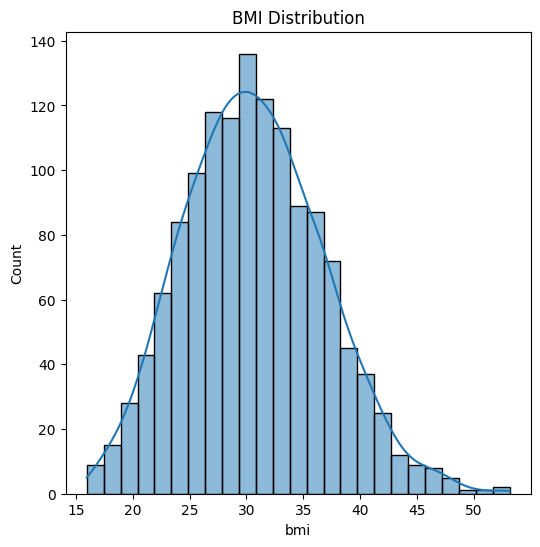

In [10]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

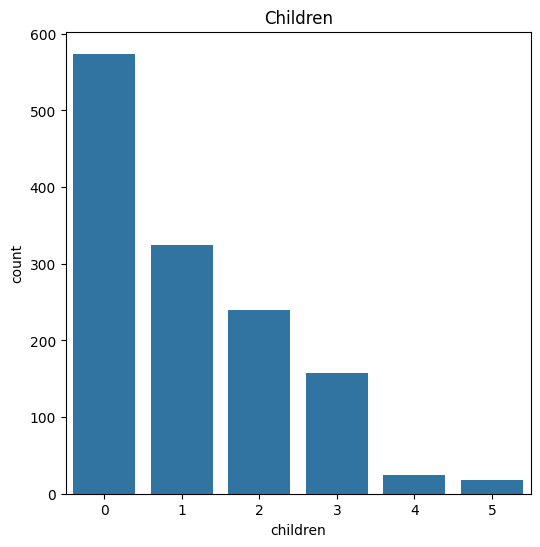

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [12]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

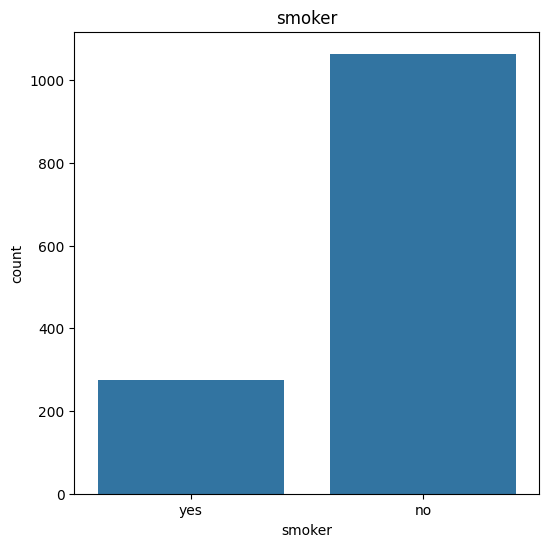

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

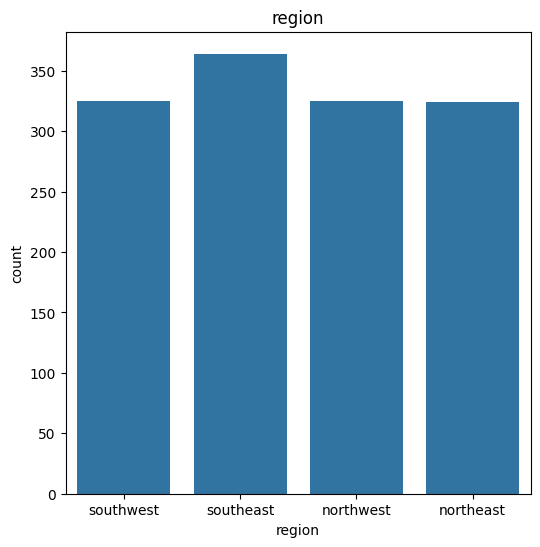

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [15]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

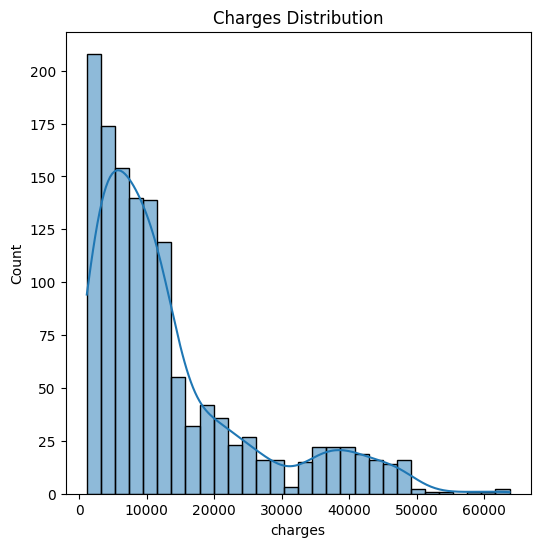

In [16]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

In [17]:
insurance_dataset['sex'] = LabelEncoder().fit_transform(insurance_dataset['sex'])
insurance_dataset['smoker'] = LabelEncoder().fit_transform(insurance_dataset['smoker'])
insurance_dataset['region'] = LabelEncoder().fit_transform(insurance_dataset['region'])

insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [18]:
X = insurance_dataset.drop(columns=['charges'], axis=1)
X = StandardScaler().fit_transform(X)
y = insurance_dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### **Linear Regression**

In [19]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

lr_model = LinearRegression()
lr_model_cv = GridSearchCV(lr_model, param_grid, cv=3, n_jobs=-1 , scoring='r2')
lr_model_cv.fit(X_train, y_train)
y_pred_lr = lr_model_cv.predict(X_test)

res = r2_score(y_test, y_pred_lr)
print(res)

score = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', lr_model_cv.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_lr))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_lr))

0.7811147722517889
Cross Val score  [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ] 0.7472559473580954 0.02404402190846488
Best Params to use  {'copy_X': True, 'fit_intercept': True, 'positive': True}
Mean Absolute error: 4213.798595
Root Mean Squared error: 5829.378522


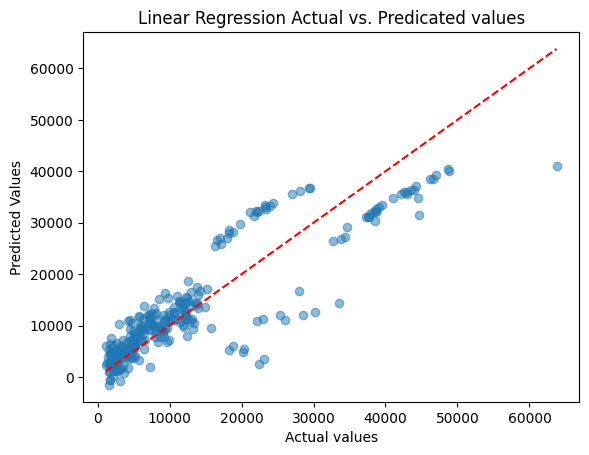

In [20]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Actual vs. Predicated values')
plt.show()

### **Decision Tree Regressor**

In [21]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_model = DecisionTreeRegressor(random_state=0)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, scoring='r2')
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.predict(X_test)

res_dt = r2_score(y_test, y_pred_dt)
print(res_dt)
score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_dt.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_dt))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_dt))

0.857075418252425
Cross Val score  [0.74741064 0.65160409 0.73224996 0.71108944 0.66303263] 0.7010773501166176 0.037719362306984264
Best Params to use  {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Absolute error: 2665.608740
Root Mean Squared error: 4710.505282


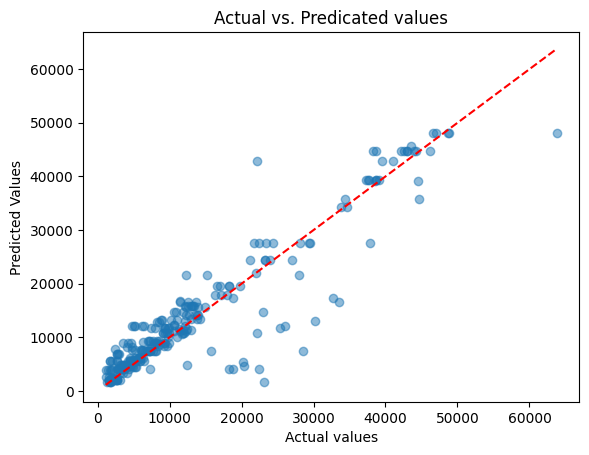

In [22]:
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **Random Forest Regressor**

In [23]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20,30,40],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

rf_model = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.predict(X_test)

res = r2_score(y_test, y_pred_rf)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_rf.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_rf))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_rf))

0.8762971663821397
Cross Val score  [0.74741064 0.65160409 0.73224996 0.71108944 0.66303263] 0.7010773501166176 0.037719362306984264
Best Params to use  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute error: 2437.005078
Root Mean Squared error: 4382.317652


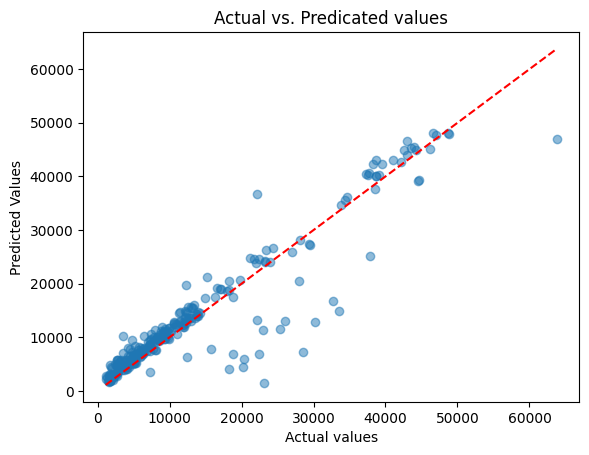

In [24]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **XGBOOST**

In [25]:
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [5,6,7],
    'learning_rate': [0.01,0.1,0.2],
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb_model = xgb.XGBRegressor()
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
y_pred_xgb = grid_search_xgb.predict(X_test)

res = r2_score(y_test, y_pred_xgb)
print(res)

score = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_xgb.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_xgb))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_xgb))

0.8794068361325638
Cross Val score  [0.82093746 0.74200333 0.82695704 0.81115496 0.8280259 ] 0.8058157367038425 0.03246365206864717
Best Params to use  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Mean Absolute error: 2508.828109
Root Mean Squared error: 4326.885221


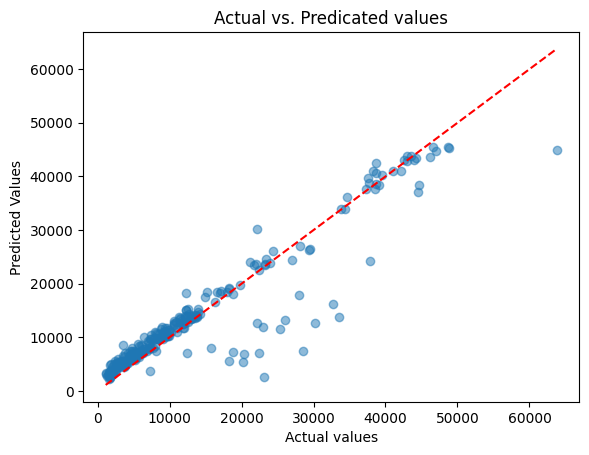

In [26]:
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()